<a href="https://colab.research.google.com/github/annalamboglia/Minicontest2/blob/main/Minicontest2_Final_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [2]:
#Collegamento al Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importo il csv

with open("/content/drive/MyDrive/Minicontest2/Training.xlsx", 'rb') as fp:
    df = pd.read_excel(fp)

df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
0,japonica alga,algae,acid_washed,5.03,NaN,NaN,7.32,14.27,43.76,6.00,2.76,55.38,NaN,NaN,0.137112,1.265539,NaN,NaN,NaN,NaN,NaN,0.469887
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,NaN,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,2.561132
2,japonica alga,algae,none,6.90,NaN,NaN,20.21,16.96,41.22,7.73,1.17,49.88,NaN,NaN,0.187530,1.210092,NaN,NaN,NaN,NaN,NaN,0.393652
3,beech wood,hardwood,none,8.00,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,2.45,4.43,52.61,0.53,NaN,0.061281,1.315908,NaN,NaN,NaN,NaN,0.6 mm <particle diameter < 1.18 mm,1.952824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,rice straw,agricultural_waste,none,6.48,82.30,1.50,8.90,16.00,43.25,5.62,2.11,48.80,0.22,NaN,0.129942,1.128324,37.8,25.3,23.3,NaN,NaN,0.307387
173,sugarcane bagasse,agricultural_waste,none,16.07,79.59,NaN,4.34,18.61,58.14,6.05,0.69,34.57,0.19,0.36,0.104059,0.594599,NaN,NaN,NaN,NaN,NaN,0.494919
174,switch grass,grass,none,7.82,72.04,15.46,4.68,NaN,47.50,5.57,0.65,45.28,NaN,NaN,0.117263,0.953263,NaN,NaN,NaN,NaN,NaN,0.018292
175,white ash,forest residue,none,10.54,75.83,13.22,0.41,NaN,47.45,6.53,0.43,45.59,NaN,NaN,0.137619,0.960801,NaN,NaN,NaN,NaN,NaN,0.015102


In [4]:
#Look at the data types whitch columns need to be encoded
df.dtypes

Material_1              object
Type_1                  object
Pretreatment_1          object
Moisture_1             float64
Volatiles_1            float64
Fixed Carbon_1         float64
Ash_1                  float64
HHV, MJ/Kg_1           float64
C_1                    float64
H_1                    float64
N_1                    float64
O_1                    float64
S_1                    float64
Cl_1                   float64
H/C(0)_1               float64
O/C(0)_1               float64
Cellulose_1            float64
Hemicellulose_1        float64
Lignin_1               float64
Extractives_1          float64
Particle Size, mm_1     object
O/C oil                float64
dtype: object

In [5]:
df.shape

(177, 22)

In [6]:
#Count the number of empty values of each columns in dataset
df.isna().sum()

Material_1               0
Type_1                   8
Pretreatment_1           1
Moisture_1              51
Volatiles_1             43
Fixed Carbon_1          49
Ash_1                   12
HHV, MJ/Kg_1            94
C_1                     13
H_1                     13
N_1                     36
O_1                     14
S_1                    111
Cl_1                   172
H/C(0)_1                13
O/C(0)_1                13
Cellulose_1             93
Hemicellulose_1        107
Lignin_1               102
Extractives_1          128
Particle Size, mm_1    143
O/C oil                  0
dtype: int64

#Boxplot

In [7]:
import plotly.graph_objects as go

def boxplot(column):
  fig = go.Figure()
  fig.add_trace(go.Box(
      y=df[column],
      name=column,
      jitter=0.3,
      pointpos=-1.8,
      boxpoints='all', # represent all points
      marker_color='rgb(7,40,89)',
      line_color='rgb(7,40,89)'
  ))

  fig.update_layout(title_text=str(column))
  fig.show()

In [8]:
for column in df.columns:
  boxplot(column)

#Insert new column




In [9]:
#o/c oil range for distribution column
min=0.0128
q1=0.2283
mediana=0.4240
q3=0.7465
upper=1.422043

list_value=[]

for value in df['O/C oil']:
  if value<=q1:
    list_value.append(1)
  elif value>q1 and value<mediana:
    list_value.append(2)
  elif value>=mediana and value<q3:
    list_value.append(3)
  elif value>=q3 and value<upper:
    list_value.append(4)
  else:
    list_value.append(5)


In [10]:
len(list_value)

177

In [11]:
new_column=pd.DataFrame(list_value, columns=['Distribution'])

new_column

,Distribution
0,3
1,5
2,2
3,2
4,5
...,...
172,2
173,3
174,1
175,1


In [12]:
df = pd.concat([df, new_column], axis=1)

In [13]:
df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
0,japonica alga,algae,acid_washed,5.03,NaN,NaN,7.32,14.27,43.76,6.00,2.76,55.38,NaN,NaN,0.137112,1.265539,NaN,NaN,NaN,NaN,NaN,0.469887,3
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,NaN,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,2.561132,5
2,japonica alga,algae,none,6.90,NaN,NaN,20.21,16.96,41.22,7.73,1.17,49.88,NaN,NaN,0.187530,1.210092,NaN,NaN,NaN,NaN,NaN,0.393652,2
3,beech wood,hardwood,none,8.00,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315,2
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,2.45,4.43,52.61,0.53,NaN,0.061281,1.315908,NaN,NaN,NaN,NaN,0.6 mm <particle diameter < 1.18 mm,1.952824,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,rice straw,agricultural_waste,none,6.48,82.30,1.50,8.90,16.00,43.25,5.62,2.11,48.80,0.22,NaN,0.129942,1.128324,37.8,25.3,23.3,NaN,NaN,0.307387,2
173,sugarcane bagasse,agricultural_waste,none,16.07,79.59,NaN,4.34,18.61,58.14,6.05,0.69,34.57,0.19,0.36,0.104059,0.594599,NaN,NaN,NaN,NaN,NaN,0.494919,3
174,switch grass,grass,none,7.82,72.04,15.46,4.68,NaN,47.50,5.57,0.65,45.28,NaN,NaN,0.117263,0.953263,NaN,NaN,NaN,NaN,NaN,0.018292,1
175,white ash,forest residue,none,10.54,75.83,13.22,0.41,NaN,47.45,6.53,0.43,45.59,NaN,NaN,0.137619,0.960801,NaN,NaN,NaN,NaN,NaN,0.015102,1


#Data Considerations

In [14]:
filtered_df = df[df['O/C oil']>=3]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
9,sugarcane bagasse,agricultural_waste,none,16.07,65.00,14.59,4.34,18.61,58.14,6.05,0.69,34.57,0.19,0.36,0.104059,0.594599,NaN,NaN,NaN,NaN,<0.50 mm,4.458494,5
59,coconut shell,agricultural_waste,none,11.26,68.18,17.18,3.38,22.83,63.45,6.73,0.43,28.27,0.17,0.95,0.106068,0.445548,NaN,NaN,NaN,NaN,<0.50 mm,4.200194,5


#Pure Nan

In [15]:
filtered_df = df[df['Hemicellulose_1']==100]
filtered_df_2 = df[df['Cellulose_1']==100]
filtered_df_3 = df[df['Lignin_1']==100]
filtered_df_4 = df[df['Extractives_1']==100]

In [16]:
vertical_concat = pd.concat([filtered_df, filtered_df_2,filtered_df_3,filtered_df_4], axis = 0)
vertical_concat

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
162,xylan,pure,none,6.51,76.16,12.31,5.02,NaN,40.25,5.76,0.32,53.62,0.05,NaN,0.143106,1.332174,NaN,100.0,NaN,NaN,NaN,0.105183,1
52,cellulose,pure,none,7.03,87.45,4.67,0.85,14.48,41.53,6.68,0.75,51.04,NaN,NaN,0.160848,1.228991,100.0,NaN,NaN,NaN,NaN,0.669970,3
89,cellulose,pure,none,7.03,87.45,4.67,0.85,NaN,41.53,6.68,0.75,51.04,NaN,NaN,0.160848,1.228991,100.0,NaN,NaN,NaN,NaN,0.836571,4
121,cellulose,pure,none,6.59,88.85,4.35,0.21,NaN,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731,1
122,cellulose,pure,none,6.59,88.85,4.35,0.21,17.32,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731,1
132,lignin,pure,none,6.87,67.10,23.09,2.94,NaN,58.70,5.45,0.37,35.43,0.05,NaN,0.092845,0.603578,NaN,NaN,100.0,NaN,NaN,0.423023,2


In [17]:
filtered_df = df[df['Type_1']=='pure']
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
52,cellulose,pure,none,7.03,87.45,4.67,0.85,14.48,41.53,6.68,0.75,51.04,NaN,NaN,0.160848,1.228991,100.0,NaN,NaN,NaN,NaN,0.669970,3
89,cellulose,pure,none,7.03,87.45,4.67,0.85,NaN,41.53,6.68,0.75,51.04,NaN,NaN,0.160848,1.228991,100.0,NaN,NaN,NaN,NaN,0.836571,4
121,cellulose,pure,none,6.59,88.85,4.35,0.21,NaN,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731,1
122,cellulose,pure,none,6.59,88.85,4.35,0.21,17.32,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731,1
132,lignin,pure,none,6.87,67.10,23.09,2.94,NaN,58.70,5.45,0.37,35.43,0.05,NaN,0.092845,0.603578,NaN,NaN,100.0,NaN,NaN,0.423023,2
162,xylan,pure,none,6.51,76.16,12.31,5.02,NaN,40.25,5.76,0.32,53.62,0.05,NaN,0.143106,1.332174,NaN,100.0,NaN,NaN,NaN,0.105183,1


Pure raws with Nan in Type column


In [18]:
filtered_df = df[df['Type_1'].isna()]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
5,mallee,NaN,none,NaN,81.90,17.60,0.50,NaN,48.40,6.30,0.10,45.20,NaN,NaN,0.130165,0.933884,NaN,NaN,NaN,NaN,"0,09÷0,6",0.777290,4
30,cellulose,NaN,none,NaN,NaN,NaN,NaN,NaN,40.90,6.40,NaN,52.70,NaN,NaN,0.156479,1.288509,NaN,NaN,NaN,NaN,NaN,0.911579,4
35,cellulose,NaN,none,NaN,NaN,NaN,NaN,NaN,40.90,6.40,NaN,52.70,NaN,NaN,0.156479,1.288509,NaN,NaN,NaN,NaN,NaN,0.910230,4
43,camelina straw pellets,NaN,none,7.60,83.85,6.10,2.45,16.85,43.10,5.65,0.25,50.95,0.05,NaN,0.131090,1.182135,NaN,NaN,NaN,NaN,"0,25÷0,50",0.907258,4
55,lignin,NaN,none,NaN,NaN,NaN,NaN,NaN,48.30,5.10,NaN,46.60,6.40,NaN,0.105590,0.964803,NaN,NaN,NaN,NaN,NaN,0.972705,4
90,wheat straw,NaN,none,5.45,80.85,9.15,4.55,16.55,42.30,5.50,0.70,51.35,0.15,NaN,0.130024,1.213948,NaN,NaN,NaN,NaN,"0,25÷0,50",0.673042,3
101,lignin,NaN,none,NaN,NaN,NaN,NaN,NaN,48.30,5.10,NaN,46.60,6.40,NaN,0.105590,0.964803,NaN,NaN,NaN,NaN,NaN,0.917411,4
105,sweet gum,NaN,none,11.31,75.79,12.42,0.71,17.10,47.88,5.57,0.08,34.65,0.03,NaN,0.116332,0.723684,NaN,NaN,25.9,NaN,2÷6,1.116972,4


In [19]:
#LA RIGA 121 e 122 è UN DUPLICATO
#La riga 52 e 89 sono uguali tranne un NaN e danno 2 valori differenti

#Fix the data Nan

In [20]:
df.loc[[121]]

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
121,cellulose,pure,none,6.59,88.85,4.35,0.21,NaN,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731,1


In [21]:
df.loc[[122]]

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
122,cellulose,pure,none,6.59,88.85,4.35,0.21,17.32,44.06,5.98,0.41,49.49,0.06,NaN,0.135724,1.123241,100.0,NaN,NaN,NaN,NaN,0.147731,1


In [22]:
#Duplicate raw
df=df.drop(121)


In [23]:
df.shape[0]

176

Pure data

In [24]:
filtered_df = df[df['Type_1'].isna()]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
5,mallee,NaN,none,NaN,81.90,17.60,0.50,NaN,48.40,6.30,0.10,45.20,NaN,NaN,0.130165,0.933884,NaN,NaN,NaN,NaN,"0,09÷0,6",0.777290,4
30,cellulose,NaN,none,NaN,NaN,NaN,NaN,NaN,40.90,6.40,NaN,52.70,NaN,NaN,0.156479,1.288509,NaN,NaN,NaN,NaN,NaN,0.911579,4
35,cellulose,NaN,none,NaN,NaN,NaN,NaN,NaN,40.90,6.40,NaN,52.70,NaN,NaN,0.156479,1.288509,NaN,NaN,NaN,NaN,NaN,0.910230,4
43,camelina straw pellets,NaN,none,7.60,83.85,6.10,2.45,16.85,43.10,5.65,0.25,50.95,0.05,NaN,0.131090,1.182135,NaN,NaN,NaN,NaN,"0,25÷0,50",0.907258,4
55,lignin,NaN,none,NaN,NaN,NaN,NaN,NaN,48.30,5.10,NaN,46.60,6.40,NaN,0.105590,0.964803,NaN,NaN,NaN,NaN,NaN,0.972705,4
90,wheat straw,NaN,none,5.45,80.85,9.15,4.55,16.55,42.30,5.50,0.70,51.35,0.15,NaN,0.130024,1.213948,NaN,NaN,NaN,NaN,"0,25÷0,50",0.673042,3
101,lignin,NaN,none,NaN,NaN,NaN,NaN,NaN,48.30,5.10,NaN,46.60,6.40,NaN,0.105590,0.964803,NaN,NaN,NaN,NaN,NaN,0.917411,4
105,sweet gum,NaN,none,11.31,75.79,12.42,0.71,17.10,47.88,5.57,0.08,34.65,0.03,NaN,0.116332,0.723684,NaN,NaN,25.9,NaN,2÷6,1.116972,4


In [25]:
for i in df.index:
  if df['Material_1'][i]=='cellulose':
    df['Type_1'][i]='pure'
    df['Cellulose_1'][i]=100.0
    df['Hemicellulose_1'][i]=0.0
    df['Lignin_1'][i]=0.0
    df['Extractives_1'][i]=0.0

  elif df['Material_1'][i]=='lignin':
    df['Type_1'][i]='pure'
    df['Cellulose_1'][i]=0.0
    df['Hemicellulose_1'][i]=0.0
    df['Lignin_1'][i]=100.0
    df['Extractives_1'][i]=0.0

  elif df['Material_1'][i]=='xylan':
    df['Type_1'][i]='pure'
    df['Cellulose_1'][i]=0.0
    df['Hemicellulose_1'][i]=100.0
    df['Lignin_1'][i]=0.0
    df['Extractives_1'][i]=0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying t

#Other categories

In [26]:
filtered_df = df[df['Fixed Carbon_1'].isna()]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
0,japonica alga,algae,acid_washed,5.03,NaN,NaN,7.32,14.27,43.76,6.00,2.76,55.38,NaN,NaN,0.137112,1.265539,NaN,NaN,NaN,NaN,NaN,0.469887,3
2,japonica alga,algae,none,6.90,NaN,NaN,20.21,16.96,41.22,7.73,1.17,49.88,NaN,NaN,0.187530,1.210092,NaN,NaN,NaN,NaN,NaN,0.393652,2
3,beech wood,hardwood,none,8.00,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315,2
6,beech wood,hardwood,none,NaN,NaN,NaN,2.80,18.20,46.30,6.30,0.10,36.10,NaN,NaN,0.136069,0.779698,NaN,NaN,NaN,NaN,2÷3,0.460692,3
7,olive husk,industrial waste,none,3.66,NaN,NaN,1.88,21.57,51.80,6.83,1.32,40.05,NaN,NaN,0.131853,0.773166,NaN,NaN,NaN,NaN,NaN,0.491506,3
12,bamboo,herbaceous,none,6.56,NaN,NaN,2.13,17.95,45.55,7.02,0.13,47.30,NaN,NaN,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.446596,3
13,poplar,hardwood,none,6.20,NaN,NaN,3.40,18.80,46.60,6.00,0.60,43.50,NaN,NaN,0.128755,0.933476,49.50,NaN,26.80,16.70,NaN,1.601695,5
16,pine wood,softwood,none,NaN,NaN,NaN,0.20,NaN,50.40,6.40,0.70,42.50,NaN,NaN,0.126984,0.843254,NaN,NaN,NaN,NaN,NaN,0.679702,3
21,pine wood,softwood,none,NaN,NaN,NaN,0.20,NaN,50.40,6.40,0.70,42.50,NaN,NaN,0.126984,0.843254,NaN,NaN,NaN,NaN,NaN,0.713208,3
23,poplar,hardwood,none,4.30,NaN,NaN,0.70,18.80,46.70,6.20,0.20,46.50,NaN,NaN,0.132762,0.995717,63.10,NaN,25.30,5.20,NaN,1.387013,4


I take the others and make a difference

In [27]:
#Moisture_1	Volatiles_1	Fixed Carbon_1	Ash_1
for i in df.index:
  if np.isnan(df['Moisture_1'][i]) and df['Volatiles_1'][i]!='nan' and df['Fixed Carbon_1'][i]!='nan' and df['Ash_1'][i]!='nan':
    df['Moisture_1'][i]=100-(df['Volatiles_1'][i]+df['Fixed Carbon_1'][i]+df['Ash_1'][i])
 
  elif np.isnan(df['Volatiles_1'][i]) and  df['Fixed Carbon_1'][i]!='nan' and df['Ash_1'][i]!='nan' and df['Moisture_1'][i]!='nan':
    df['Volatiles_1'][i]=100-(df['Moisture_1'][i]+df['Fixed Carbon_1'][i]+df['Ash_1'][i])
  
  elif np.isnan(df['Fixed Carbon_1'][i]) and  df['Volatiles_1'][i]!='nan' and df['Ash_1'][i]!='nan'and df['Moisture_1'][i]!='nan':
    df['Fixed Carbon_1'][i]=100-(df['Moisture_1'][i]+df['Volatiles_1'][i]+df['Ash_1'][i])
  
  elif np.isnan(df['Ash_1'][i]) and  df['Fixed Carbon_1'][i]!='nan' and df['Volatiles_1'][i]!='nan'and df['Moisture_1'][i]!='nan':
    df['Ash_1'][i]=100-(df['Moisture_1'][i]+df['Fixed Carbon_1'][i]+df['Volatiles_1'][i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
#C_1	H_1	N_1	O_1	S_1	Cl_1
for i in df.index:
  if np.isnan(df['C_1'][i]) and df['H_1'][i]!='nan' and df['N_1'][i]!='nan' and df['S_1'][i]!='nan' and df['O_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['C_1'][i]=100-(df['H_1'][i]+df['N_1'][i]+df['O_1'][i]+df['S_1'][i]+df['Cl_1'][i])
 
  elif np.isnan(df['H_1'][i]) and df['C_1'][i]!='nan' and df['N_1'][i]!='nan' and df['S_1'][i]!='nan' and df['O_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['H_1'][i]=100-(df['C_1'][i]+df['N_1'][i]+df['O_1'][i]+df['S_1'][i]+df['Cl_1'][i])
  
  elif np.isnan(df['N_1'][i]) and df['C_1'][i]!='nan' and df['H_1'][i]!='nan' and df['S_1'][i]!='nan' and df['O_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['N_1'][i]=100-(df['C_1'][i]+df['H_1'][i]+df['O_1'][i]+df['S_1'][i]+df['Cl_1'][i])
  
  elif np.isnan(df['O_1'][i]) and df['C_1'][i]!='nan' and df['N_1'][i]!='nan' and df['S_1'][i]!='nan' and df['H_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['O_1'][i]=100-(df['C_1'][i]+df['N_1'][i]+df['H_1'][i]+df['S_1'][i]+df['Cl_1'][i])
  
  elif np.isnan(df['S_1'][i]) and df['C_1'][i]!='nan' and df['N_1'][i]!='nan' and df['H_1'][i]!='nan' and df['O_1'][i]!='nan' and df['Cl_1'][i]!='nan':
    df['S_1'][i]=100-(df['C_1'][i]+df['N_1'][i]+df['O_1'][i]+df['H_1'][i]+df['Cl_1'][i])
  
  elif np.isnan(df['Cl_1'][i]) and df['C_1'][i]!='nan' and df['N_1'][i]!='nan' and df['S_1'][i]!='nan' and df['O_1'][i]!='nan' and df['H_1'][i]!='nan':
    df['Cl_1'][i]=100-(df['C_1'][i]+df['N_1'][i]+df['O_1'][i]+df['S_1'][i]+df['H_1'][i])
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is tryin

In [29]:
df.groupby('Material_1').count()


,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
Material_1,,,,,,,,,,,,,,,,,,,,,,
acacia wood,2,2,2,2,2,2,1,2,2,2,2,1,1,2,2,0,1,1,1,1,2,2
ba30 rice70,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1
ba50 rice50,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1
ba70 rice30,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1
bagasse,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,1,1
bamboo,9,9,9,5,5,9,7,9,9,9,9,3,3,9,9,5,3,3,0,2,9,9
beech wood,10,10,6,2,2,8,2,8,8,4,8,2,2,8,8,2,2,2,2,6,10,10
blend 1- wtp/tp/sg,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1
blend 2- wtp/cp/hp,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1


In [30]:
df_mask=df['Material_1']=='paper mill sludge (pms)'
df_mask
filtered_df = df[df_mask]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
139,paper mill sludge (pms),industrial waste,none,-1.000000e-01,52.2,33.5,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.4,32.1,5.2,14.4,NaN,0.250225,2
140,paper mill sludge (pms),industrial waste,torrefaction,-1.000000e-01,52.6,32.7,14.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,29.4,3.8,14.8,NaN,0.237892,2
141,paper mill sludge (pms),industrial waste,NaN,-1.000000e-01,52.2,33.5,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.4,32.1,5.2,14.4,NaN,0.250225,2
142,paper mill sludge (pms),industrial waste,torrefaction (220c),-1.000000e-01,52.6,32.7,14.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,29.4,3.8,14.8,NaN,0.237892,2
143,paper mill sludge (pms),industrial waste,acid_washed,-1.000000e+00,39.7,42.2,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.5,13.4,7.8,19.1,NaN,0.236530,2
144,paper mill sludge (pms),industrial waste,acid_washed,1.200000e+00,29.0,45.0,24.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.2,14.5,10.5,24.8,NaN,0.240872,2
145,paper mill sludge (pms),industrial waste,acid_washed,0.000000e+00,30.4,46.0,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.2,14.3,12.4,23.6,NaN,0.240872,2
146,paper mill sludge (pms),industrial waste,acid_washed,-1.000000e-01,28.9,49.2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.4,15.3,11.6,22.0,NaN,0.240872,2
147,paper mill sludge (pms),industrial waste,acid_washed,1.421085e-14,20.4,46.3,33.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.6,12.9,10.5,33.3,NaN,0.240872,2


In [31]:
#riga 141 e 139 sono uguali
#Riga duplicato
df=df.drop(141)

In [32]:
df_mask=df['Material_1']=='bamboo'
df_mask
filtered_df = df[df_mask]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,1.421085e-14,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,2.561132,5
12,bamboo,herbaceous,none,6.56,NaN,NaN,2.13,17.95,45.55,7.02,0.13,47.30,NaN,NaN,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.446596,3
48,bamboo,herbaceous,none,6.56,NaN,NaN,2.13,17.95,45.55,7.02,0.13,47.30,NaN,NaN,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.548881,3
56,bamboo,herbaceous,none,6.56,NaN,NaN,2.13,17.95,45.55,7.02,0.13,47.30,NaN,NaN,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.424027,3
75,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,1.421085e-14,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,1.197149,4
83,bamboo,herbaceous,none,6.56,NaN,NaN,2.13,17.95,45.55,7.02,0.13,47.30,NaN,NaN,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0.454238,3
118,bamboo,forest residue,none,0.00,77.73,15.99,6.28,NaN,42.16,5.74,0.37,51.73,NaN,NaN,0.136148,1.226992,47.5,NaN,NaN,NaN,NaN,0.066031,1
119,bamboo,forest residue,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,1.421085e-14,0.124733,1.002559,41.0,26.5,25.3,NaN,NaN,0.060429,1
164,bamboo,forest residue,drying,0.00,77.73,15.99,6.28,NaN,42.16,5.74,0.37,51.73,NaN,NaN,0.136148,1.226992,47.5,NaN,NaN,NaN,NaN,0.099123,1


In [33]:
df_mask=df['Material_1']=='beech wood'
df_mask
filtered_df = df[df_mask]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
3,beech wood,hardwood,none,8.0,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315,2
6,beech wood,hardwood,none,NaN,NaN,NaN,2.80,18.2,46.30,6.30,0.1,36.10,NaN,NaN,0.136069,0.779698,NaN,NaN,NaN,NaN,2÷3,0.460692,3
10,beech wood,hardwood,none,6.0,85.3,14.3,0.40,NaN,50.80,5.90,0.3,42.90,0.02,0.08,0.116142,0.844488,NaN,NaN,NaN,NaN,10,0.519105,3
40,beech wood,hardwood,none,8.0,NaN,NaN,1.35,NaN,45.98,6.39,NaN,46.28,NaN,NaN,0.138973,1.006525,39.25,33.91,21.75,3.74,NaN,0.108948,1
64,beech wood,hardwood,none,8.0,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.233023,2
69,beech wood,hardwood,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,25÷2",0.878059,4
70,beech wood,hardwood,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,25÷2",1.208742,4
93,beech wood,hardwood,none,6.0,85.3,14.3,0.40,NaN,50.80,5.90,0.3,42.90,0.02,0.08,0.116142,0.844488,NaN,NaN,NaN,NaN,10,0.475768,3
95,beech wood,hardwood,none,NaN,NaN,NaN,2.80,18.2,46.30,6.30,0.1,36.10,NaN,NaN,0.136069,0.779698,NaN,NaN,NaN,NaN,2÷3,0.400000,2
120,beech wood,hardwood,none,8.0,NaN,NaN,1.35,NaN,45.98,6.39,NaN,46.28,NaN,NaN,0.138973,1.006525,39.25,33.91,21.75,3.74,NaN,0.096183,1


In [34]:
df_mask=df['Material_1']=='rice straw'
df_mask
filtered_df = df[df_mask]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,2.45,4.43,52.61,0.53,0.000000e+00,0.061281,1.315908,NaN,NaN,NaN,NaN,0.6 mm <particle diameter < 1.18 mm,1.952824,5
29,rice straw,agricultural_waste,none,7.30,60.84,16.61,22.55,13.45,48.75,5.98,1.99,43.28,NaN,NaN,0.122667,0.887795,NaN,NaN,NaN,NaN,NaN,2.093103,5
44,rice straw,agricultural_waste,none,6.80,82.80,1.50,8.90,16.00,43.25,5.62,2.11,48.80,0.22,0.000000e+00,0.129942,1.128324,37.80,25.30,23.30,NaN,5,0.876194,4
80,rice straw,agricultural_waste,none,7.30,60.84,16.61,22.55,13.45,48.75,5.98,1.99,43.28,NaN,NaN,0.122667,0.887795,NaN,NaN,NaN,NaN,NaN,2.108014,5
91,rice straw,agricultural_waste,none,7.30,60.84,16.61,22.55,13.45,48.75,5.98,1.99,43.28,NaN,NaN,0.122667,0.887795,NaN,NaN,NaN,NaN,NaN,2.071918,5
94,rice straw,agricultural_waste,none,7.30,60.84,16.61,22.55,13.45,48.75,5.98,1.99,43.28,NaN,NaN,0.122667,0.887795,NaN,NaN,NaN,NaN,NaN,2.472441,5
157,rice straw,agricultural_waste,none,-0.01,81.10,6.30,12.61,NaN,38.02,5.75,0.65,55.58,NaN,NaN,0.151236,1.461862,30.00,NaN,NaN,NaN,NaN,0.300963,2
158,rice straw,agricultural_waste,none,6.80,82.80,1.50,8.90,16.00,43.25,5.62,2.11,48.80,0.22,0.000000e+00,0.129942,1.128324,37.80,25.30,23.30,NaN,NaN,0.307387,2
159,rice straw,agricultural_waste,drying,0.00,81.10,6.30,12.61,NaN,38.02,5.75,0.65,55.58,NaN,NaN,0.151236,1.461862,30.00,NaN,NaN,NaN,NaN,0.273635,2
168,rice straw,agricultural_waste,none,13.61,76.85,0.00,9.54,16.35,50.93,6.04,0.83,41.61,0.23,3.600000e-01,0.118594,0.817004,NaN,NaN,NaN,NaN,NaN,0.504658,3


In [35]:
#80.91.94,29 uguali

In [36]:
filtered_df = df[df['Extractives_1']>0]
filtered_df

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Distribution
8,napier grass,grass,none,7.530000e+01,81.50,16.70,1.75,18.10,48.60,6.01,0.99,44.10,0.320,-2.000000e-02,0.123663,0.907407,38.800000,19.800000,27.000000,12.070000,NaN,0.650568,3
13,poplar,hardwood,none,6.200000e+00,NaN,NaN,3.40,18.80,46.60,6.00,0.60,43.50,NaN,NaN,0.128755,0.933476,49.500000,NaN,26.800000,16.700000,NaN,1.601695,5
20,pine wood,softwood,none,7.640000e+00,77.86,14.16,0.34,17.64,46.55,6.47,NaN,46.98,NaN,NaN,0.138990,1.009237,45.330000,28.380000,28.340000,2.360000,1,0.525429,3
22,wheat straw,agricultural_waste,none,2.000000e+00,80.50,10.60,6.90,NaN,44.40,5.60,5.40,44.60,NaN,NaN,0.126126,1.004505,44.800000,33.000000,13.800000,1.400000,"0,18-0,28",1.217918,4
23,poplar,hardwood,none,4.300000e+00,NaN,NaN,0.70,18.80,46.70,6.20,0.20,46.50,NaN,NaN,0.132762,0.995717,63.100000,NaN,25.300000,5.200000,NaN,1.387013,4
27,poplar,hardwood,none,7.000000e+00,NaN,NaN,5.50,18.50,45.80,5.90,1.40,41.50,NaN,NaN,0.128821,0.906114,NaN,NaN,32.100000,21.000000,0.3,2.561265,5
32,corn stover,agricultural_waste,none,3.000000e-02,79.00,16.70,4.27,NaN,48.70,5.70,0.70,44.90,NaN,NaN,0.117043,0.921971,36.340000,39.910000,16.800000,6.950000,NaN,1.422043,5
33,blend 1- wtp/tp/sg,blend,none,4.000000e-02,82.60,15.70,1.66,NaN,49.30,5.90,0.30,44.50,NaN,NaN,0.119675,0.902637,38.953333,18.166667,38.953333,3.926667,NaN,1.254364,4
37,switch grass,grass,none,0.000000e+00,80.20,15.60,4.20,NaN,47.20,5.70,0.50,46.60,NaN,NaN,0.120763,0.987288,34.880000,42.060000,17.320000,5.740000,NaN,1.578348,5
38,napier grass,grass,none,7.530000e+01,81.50,16.70,1.75,18.10,48.60,6.01,0.99,44.10,0.320,-2.000000e-02,0.123663,0.907407,38.800000,19.800000,27.000000,12.070000,NaN,0.619048,3


In [37]:
#Cellulose_1	Hemicellulose_1	Lignin_1	Extractives_1
for i in df.index:
  if np.isnan(df['Cellulose_1'][i]) and df['Hemicellulose_1'][i]!='nan' and df['Lignin_1'][i]!='nan' and df['Extractives_1'][i]!='nan':
    df['Cellulose_1'][i]=100-(df['Hemicellulose_1'][i]+df['Lignin_1'][i]+df['Extractives_1'][i])
 
  elif np.isnan(df['Hemicellulose_1'][i]) and df['Lignin_1'][i]!='nan' and df['Extractives_1'][i]!='nan' and df['Cellulose_1'][i]!='nan':
    df['Hemicellulose_1'][i]=100-(df['Lignin_1'][i]+df['Extractives_1'][i]+df['Cellulose_1'][i])
  
  elif np.isnan(df['Lignin_1'][i]) and df['Extractives_1'][i]!='nan' and df['Cellulose_1'][i]!='nan' and df['Hemicellulose_1'][i]!='nan':
    df['Lignin_1'][i]=100-(df['Extractives_1'][i]+df['Cellulose_1'][i]+df['Hemicellulose_1'][i])
  
  elif np.isnan(df['Extractives_1'][i]) and df['Cellulose_1'][i]!='nan' and df['Hemicellulose_1'][i]!='nan' and df['Lignin_1'][i]!='nan':
    df['Extractives_1'][i]=100-(df['Cellulose_1'][i]+df['Hemicellulose_1'][i]+df['Lignin_1'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The results that I could not calculate I put equal to 0

In [38]:
#C_1	H_1	N_1	O_1	S_1	Cl_1
#Moisture_1	Volatiles_1	Fixed Carbon_1	Ash_1
#Cellulose_1	Hemicellulose_1	Lignin_1	Extractives_1

colonne=["C_1",	"H_1",	"N_1",	"O_1",	"S_1",	"Cl_1", "Moisture_1",	"Volatiles_1",	"Fixed Carbon_1",	"Ash_1", 
         "Cellulose_1",	"Hemicellulose_1",	"Lignin_1",	"Extractives_1"]

for column in colonne:
  df[column] = df[column].fillna(0)

In [39]:
#Count the number of empty values of each columns in dataset
df.isna().sum()

Material_1               0
Type_1                   4
Pretreatment_1           0
Moisture_1               0
Volatiles_1              0
Fixed Carbon_1           0
Ash_1                    0
HHV, MJ/Kg_1            92
C_1                      0
H_1                      0
N_1                      0
O_1                      0
S_1                      0
Cl_1                     0
H/C(0)_1                12
O/C(0)_1                12
Cellulose_1              0
Hemicellulose_1          0
Lignin_1                 0
Extractives_1            0
Particle Size, mm_1    141
O/C oil                  0
Distribution             0
dtype: int64

(array([94., 47., 18.,  6.,  4.,  4.,  0.,  0.,  0.,  2.]),
 array([0.01284999, 0.45741441, 0.90197883, 1.34654325, 1.79110767,
        2.2356721 , 2.68023652, 3.12480094, 3.56936536, 4.01392979,
        4.45849421]),
 <a list of 10 Patch objects>)

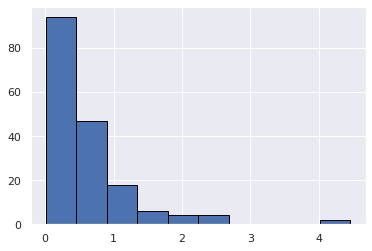

In [40]:
plt.hist(df['O/C oil'], edgecolor='black')

#Considerations

In [41]:
#Count the number of empty values of each columns in dataset
df.isna().sum()

Material_1               0
Type_1                   4
Pretreatment_1           0
Moisture_1               0
Volatiles_1              0
Fixed Carbon_1           0
Ash_1                    0
HHV, MJ/Kg_1            92
C_1                      0
H_1                      0
N_1                      0
O_1                      0
S_1                      0
Cl_1                     0
H/C(0)_1                12
O/C(0)_1                12
Cellulose_1              0
Hemicellulose_1          0
Lignin_1                 0
Extractives_1            0
Particle Size, mm_1    141
O/C oil                  0
Distribution             0
dtype: int64

These columns are very dependent on the others I have in fact degrees of freedom

In [42]:
df=df.drop(columns=["Cl_1","Extractives_1"])

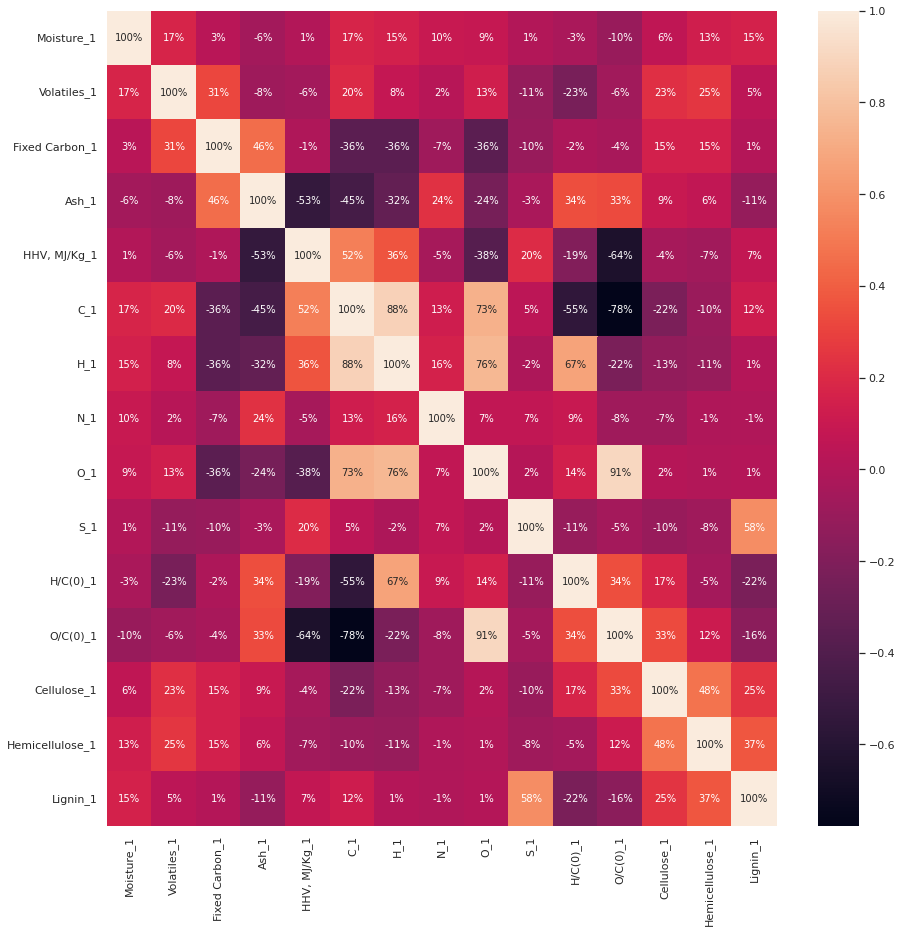

In [43]:
#Visualize the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.iloc[:,1:df.shape[1]-2].corr(), annot=True, fmt='.0%')

#Correlation

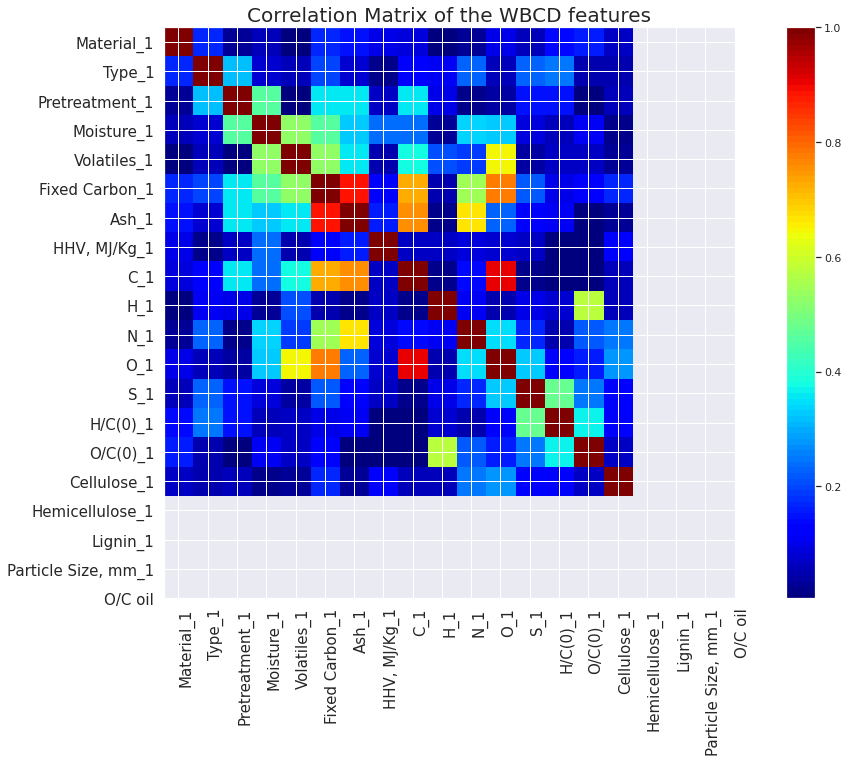

In [44]:
# Bivariate Analysis
# Make a Features Correlation Matrix of the WBCD features
# Readapted from AN6U5

def features_correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 100)
    
    # interpolation='nearest' simply displays an image without 
    # trying to interpolate between pixels if the display 
    # resolution is not the same as the image resolution
    # The correlation is returned in absolute values:
    cax = ax1.imshow(df.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix of the WBCD features',fontsize=20)
    labels=list(df.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
df_features = df.drop(df.columns[-1],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(df_features)

In [45]:
# Dropping of features with a correlation greater than 0.8
# Code readapted from Chris Albon
# Create the correlation matrix with absolute values
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [46]:
to_drop

['H_1', 'O/C(0)_1']

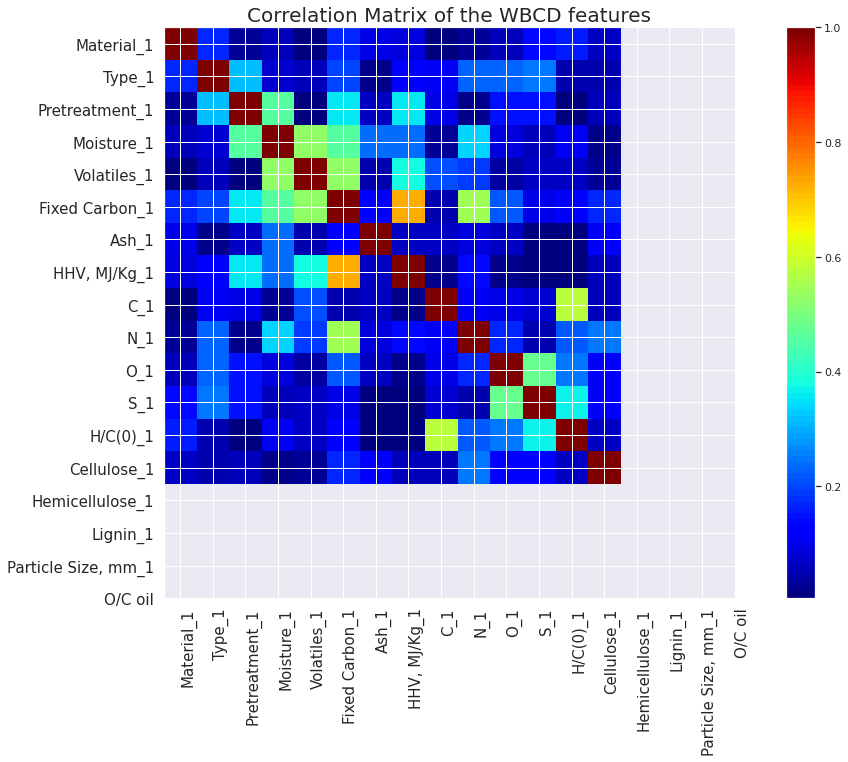

In [47]:
# Drop the redundant features from the df
df_features_corr_dropped = df_features.drop(df_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# Using the feature_correlation_matrix() function
features_correlation_matrix(df_features_corr_dropped)

In [48]:
# Print a table with all the features correlations
# Redundant features were dropped from the original 30 features dataset
# To get the correlation, we apply the .corr() method
# followed by the .abs() method to the df_features_corr_dropped DataFrame
df_features_corr_dropped.corr().abs()

,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,N_1,O_1,S_1,H/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,O/C oil
Moisture_1,1.000000,0.167236,0.028701,0.059476,0.005098,0.167093,0.095179,0.089112,0.005315,0.030216,0.060403,0.134643,0.154473,0.073501
Volatiles_1,0.167236,1.000000,0.314950,0.080150,0.058077,0.199144,0.021683,0.134361,0.114135,0.231969,0.227620,0.251153,0.046053,0.048015
Fixed Carbon_1,0.028701,0.314950,1.000000,0.457881,0.012040,0.360354,0.073147,0.355972,0.100646,0.015435,0.152281,0.149516,0.007115,0.056140
Ash_1,0.059476,0.080150,0.457881,1.000000,0.531935,0.453117,0.235155,0.241682,0.031746,0.341686,0.091470,0.063701,0.111289,0.023202
"HHV, MJ/Kg_1",0.005098,0.058077,0.012040,0.531935,1.000000,0.522914,0.048596,0.378552,0.204220,0.191990,0.043057,0.066245,0.071929,0.032820
C_1,0.167093,0.199144,0.360354,0.453117,0.522914,1.000000,0.125578,0.729478,0.046185,0.550799,0.220528,0.095154,0.122571,0.166598
N_1,0.095179,0.021683,0.073147,0.235155,0.048596,0.125578,1.000000,0.065042,0.066554,0.090958,0.071339,0.013819,0.005533,0.128676
O_1,0.089112,0.134361,0.355972,0.241682,0.378552,0.729478,0.065042,1.000000,0.015764,0.139638,0.016628,0.005737,0.012747,0.061158
S_1,0.005315,0.114135,0.100646,0.031746,0.204220,0.046185,0.066554,0.015764,1.000000,0.109493,0.103158,0.075967,0.579110,0.063151
H/C(0)_1,0.030216,0.231969,0.015435,0.341686,0.191990,0.550799,0.090958,0.139638,0.109493,1.000000,0.168812,0.048885,0.222814,0.251550


In [49]:
df=df.drop(columns=to_drop)

#Encoding

In [50]:
categorical_cols=df.columns[df.dtypes==object].tolist()
categorical_cols

['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1']

In [51]:
df["Material_1_cat"]=df["Material_1"].astype('category').cat.codes
df["Type_1_cat"]=df["Type_1"].astype('category').cat.codes
df["Pretreatment_1_cat"]=df["Pretreatment_1"].astype('category').cat.codes
df["Particle Size, mm_1_cat"]=df["Particle Size, mm_1"].astype('category').cat.codes
df.head()

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,N_1,O_1,S_1,H/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,"Particle Size, mm_1",O/C oil,Distribution,Material_1_cat,Type_1_cat,Pretreatment_1_cat,"Particle Size, mm_1_cat"
0,japonica alga,algae,acid_washed,5.03,0.00,0.00,7.32,14.27,43.76,2.76,55.38,0.00,0.137112,0.0,0.0,0.0,NaN,0.469887,3,22,1,0,-1
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,0.21,47.02,0.02,0.124733,41.0,26.5,25.3,0.6,2.561132,5,5,0,2,11
2,japonica alga,algae,none,6.90,0.00,0.00,20.21,16.96,41.22,1.17,49.88,0.00,0.187530,0.0,0.0,0.0,NaN,0.393652,2,22,1,2,-1
3,beech wood,hardwood,none,8.00,0.00,0.00,0.54,NaN,48.44,0.00,45.73,0.00,0.120355,0.0,0.0,0.0,NaN,0.236315,2,6,5,2,-1
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,4.43,52.61,0.53,0.061281,0.0,0.0,0.0,0.6 mm <particle diameter < 1.18 mm,1.952824,5,40,0,2,12


In [52]:
df.columns

Index(['Material_1', 'Type_1', 'Pretreatment_1', 'Moisture_1', 'Volatiles_1',
       'Fixed Carbon_1', 'Ash_1', 'HHV, MJ/Kg_1', 'C_1', 'N_1', 'O_1', 'S_1',
       'H/C(0)_1', 'Cellulose_1', 'Hemicellulose_1', 'Lignin_1',
       'Particle Size, mm_1', 'O/C oil', 'Distribution', 'Material_1_cat',
       'Type_1_cat', 'Pretreatment_1_cat', 'Particle Size, mm_1_cat'],
      dtype='object')

#Split

In [53]:
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1','Particle Size, mm_1',"Distribution"])
Y=df["O/C oil"]

In [54]:
X.columns

Index(['Moisture_1', 'Volatiles_1', 'Fixed Carbon_1', 'Ash_1', 'HHV, MJ/Kg_1',
       'C_1', 'N_1', 'O_1', 'S_1', 'H/C(0)_1', 'Cellulose_1',
       'Hemicellulose_1', 'Lignin_1', 'Material_1_cat', 'Type_1_cat',
       'Pretreatment_1_cat', 'Particle Size, mm_1_cat'],
      dtype='object')

In [55]:
#Split the training e validation 70% and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=df["Distribution"], random_state=0)

In [56]:
X_train_all=X_train
Y_train_all=Y_train

In [57]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

In [58]:
df_X_train=X_train
df_Y_train=Y_train

Missing value

In [59]:
import statistics
mediane={}
mediane_tot={}

for column in X_train.columns:
  median=X_train.groupby(column)[column].transform("median")
  X_train[column].fillna(median, inplace=True)
  mediane.update({column: median})
  print(str(column) + ": " + str(statistics.median(X_train[column])))


Moisture_1: 5.18
Volatiles_1: 74.76
Fixed Carbon_1: 14.27
Ash_1: 2.45
HHV, MJ/Kg_1: nan
C_1: 46.9
N_1: 0.3
O_1: 45.2
S_1: 0.0
H/C(0)_1: nan
Cellulose_1: 20.35
Hemicellulose_1: 0.0
Lignin_1: 0.0
Material_1_cat: 27
Type_1_cat: 5
Pretreatment_1_cat: 2
Particle Size, mm_1_cat: -1


In [60]:
for column in X_train.columns[3:-1]:
  
  X_train[column]=X_train[column].fillna(mediane[column])
  X_validation[column]=X_validation[column].fillna(mediane[column])
  X_test[column]=X_test[column].fillna(mediane[column])
  X_train_all[column]=X_train_all[column].fillna(mediane[column])

X_train=X_train.fillna(-1)
X_validation=X_validation.fillna(-1)
X_test=X_test.fillna(-1)

X_train_all=X_train_all.fillna(-1)

In [61]:
#NaN Values
df1 = X_train[X_train.isna().any(axis=1)]

df1

,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,N_1,O_1,S_1,H/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Material_1_cat,Type_1_cat,Pretreatment_1_cat,"Particle Size, mm_1_cat"


#Normalization

In [62]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation=sc.transform(X_validation)
X_test = sc.transform(X_test)

X_train_all=sc.transform(X_train_all)

In [63]:
X_train = np.array(X_train)
X_validation=np.array(X_validation)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_validation=np.array(Y_validation)
Y_test = np.array(Y_test)

X_train_all=np.array(X_train_all)
Y_train_all=np.array(Y_train_all)

#Models

In [64]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [65]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    SVR(),
    SVR(kernel="poly"),
    SVR(kernel="rbf")
]

In [66]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_validation)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_validation, y_pred))
    print("\tMean absolute error:", mean_absolute_error(Y_validation, y_pred))
    print("\tR2 score:", r2_score(Y_validation, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.000s
	Prediction time: 0.001s
	Explained variance: 0.36644402891753425
	Mean absolute error: 0.43008322685523664
	R2 score: 0.3531275697324695

GradientBoostingRegressor()
	Training time: 0.038s
	Prediction time: 0.000s
	Explained variance: 0.788582918980995
	Mean absolute error: 0.26787023818136796
	R2 score: 0.7706349285930753

ExtraTreesRegressor()
	Training time: 0.091s
	Prediction time: 0.008s
	Explained variance: 0.7171751302318115
	Mean absolute error: 0.31260366140494955
	R2 score: 0.7091230723330801

RandomForestRegressor()
	Training time: 0.143s
	Prediction time: 0.008s
	Explained variance: 0.7089436670363705
	Mean absolute error: 0.3376673518326072
	R2 score: 0.7068550311407188

DecisionTreeRegressor()
	Training time: 0.004s
	Prediction time: 0.000s
	Explained variance: 0.599261939040719
	Mean absolute error: 0.42058723653597163
	R2 score: 0.5284171000060357

LinearRegression()
	Training time: 0.002s
	Prediction time: 0.000s
	Explained

#Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

ExtraTreesRegressor

In [93]:
parameters = {'max_depth':[9,10,11,12,13,14], 'criterion':['squared_error','absolute_error'], 'n_estimators': [100,200,300,1000]}

In [94]:
grid = GridSearchCV(ExtraTreesRegressor(), parameters, scoring='neg_mean_absolute_error', cv=5)
model = grid.fit(X_train_all,Y_train_all)

In [95]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'absolute_error', 'max_depth': 11, 'n_estimators': 100} 

ExtraTreesRegressor(criterion='absolute_error', max_depth=11) 



Gradient boost

In [96]:
parameters = { 'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [ ]:
grid = GridSearchCV(GradientBoostingRegressor(), parameters, scoring='neg_mean_absolute_error', cv=5)
model = grid.fit(X_train_all,Y_train_all)

In [98]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'absolute_error', 'learning_rate': 0.25, 'loss': 'squared_error', 'max_features': 'log2'} 

GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25,
                          max_features='log2') 



Random Forest

In [151]:
parameters = { 'max_depth' : [100,200,300,500,1000], 'min_samples_split': [3,4,5]}

In [152]:
grid = GridSearchCV(RandomForestRegressor(), parameters, scoring='neg_mean_absolute_error', cv=5)
model = grid.fit(X_train_all,Y_train_all)

In [153]:
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'max_depth': 100, 'min_samples_split': 3} 

RandomForestRegressor(max_depth=100, min_samples_split=3) 



#Random Forest

In [194]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(max_depth=100, min_samples_split=3, random_state=20)  
#rf = RandomForestRegressor(max_depth=13, min_samples_split=3) 
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=100, min_samples_split=3, random_state=20)

Validation

In [195]:
# test the output by changing values, like 3750
y_pred = rf.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.33210287 0.72252683 0.62506251 0.6300505  0.42701763 0.56174913
 0.62040032 1.57535984 0.38537271 0.3993825  0.83204177 0.55505731
 0.6254597  0.63470339 0.71113712 0.78758726 0.38349118 0.6625518
 0.32692826 1.32382765 0.86409861 0.52337302 0.7847277  0.25548779
 0.3993825  0.84652906 1.57535984 0.58075834 3.39912438 0.44763317
 0.52431757]


In [196]:
from sklearn.metrics import mean_absolute_error

y_pred = rf.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))
#get_depth returns the depth of the tree

0.3367808637558094


Test

In [197]:
# test the output by changing values, like 3750
y_pred_test = rf.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred_test) 

Predicted O/C oil:
[0.6254597  0.463898   0.65983485 0.14399377 0.37734449 1.59479668
 0.74277591 1.24498207 0.55697072 0.85541887 0.33723929 0.52138312
 1.57535984 0.19956901 0.78758726 0.6300505  0.71113712 0.71113712
 0.62040032 0.55985437 0.3858308  0.86100494 0.463898   0.85634174
 0.42701763 0.26720917 0.55985437 0.57800469 0.55697072 0.7847277
 0.54326923 0.3382138  0.56824413 0.39523687 0.24888213 0.25269309
 0.23008243 0.43424226 0.78758726 0.62040032 1.51947657 0.54087834
 0.5392768  0.43808577 0.45315084 0.52138312 0.71366795 0.7307239
 0.82089899 0.55985437 0.32339158 0.27241519 0.54088079]


In [198]:
from sklearn.metrics import mean_absolute_error

y_pred_test = rf.predict(X_test)
print(mean_absolute_error(Y_test, y_pred_test))
#get_depth returns the depth of the tree

0.3368848412008369


#Gradient Regressor

In [121]:
#Gradient Regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25,
                          max_features='log2', random_state=19) 
#model=GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25,max_features='auto', random_state=12)   
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning:

criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.



GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25,
                          max_features='log2', random_state=19)

Validation

In [122]:
# test the output by changing values, like 3750
y_pred = model.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.16394559 0.24017112 0.60297357 0.61043664 0.42473467 0.53376804
 0.49339118 2.26764143 0.46082802 0.30512031 1.29784691 0.46407575
 0.52502719 0.51550509 0.73885497 0.61773957 0.4954147  0.3754674
 0.08329528 1.62712387 1.93444654 0.47715325 0.88267024 0.24069089
 0.30512031 0.6262888  2.26764143 0.5686941  2.99107005 0.10377752
 0.36031822]


In [123]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))
#get_depth returns the depth of the tree

0.28671676703649973


Test

In [124]:
# test the output by changing values, like 3750
y_pred_test = model.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred_test) 

Predicted O/C oil:
[0.52502719 0.40462802 0.49071584 0.06965013 0.23853541 0.45890809
 0.8359093  0.78178144 0.66862858 0.90723658 0.09347109 0.53586754
 2.26764143 0.15212483 0.61773957 0.61043664 0.73885497 0.73885497
 0.49339118 0.52817403 0.29477426 1.0831239  0.40462802 0.91612201
 0.42473467 0.24796309 0.52817403 0.94278919 0.66862858 0.88267024
 0.42833265 0.37508375 0.53541645 0.46082802 0.2431664  0.23832755
 0.13395067 0.43372324 0.61773957 0.49339118 2.02458262 0.34990212
 0.5686941  0.33433347 0.31513821 0.53586754 0.65156911 0.24087318
 0.403841   0.52817403 0.27657006 0.25209929 0.24326091]


In [125]:
from sklearn.metrics import mean_absolute_error

y_pred_test = model.predict(X_test)
print(mean_absolute_error(Y_test, y_pred_test))
#get_depth returns the depth of the tree

0.3081884781348163


#ExtraTreesRegressor

In [126]:
#criterion{“squared_error”, “absolute_error”}, default=”squared_error”
from sklearn.ensemble import ExtraTreesRegressor
#regressor = ExtraTreesRegressor(max_depth=9, n_estimators=300, random_state=10) 
regressor=ExtraTreesRegressor(criterion='absolute_error', max_depth=11)
#regressor = ExtraTreesRegressor(n_estimators=100, max_depth=11, random_state=10)
regressor.fit(X_train,Y_train)

ExtraTreesRegressor(criterion='absolute_error', max_depth=11)

In [127]:
# test the output by changing values, like 3750
y_pred = regressor.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.20503412 0.26006475 0.56514926 0.56236582 0.44130641 0.53367868
 0.54063439 2.04215597 0.51010921 0.44426087 0.80705842 0.42954592
 0.52761033 0.81143892 0.44128643 0.57725478 0.53408818 0.6175292
 0.13368235 1.32769594 1.15635938 0.46149833 1.14087408 0.27014552
 0.44426087 0.64630619 2.04215597 0.32769612 3.06737009 0.34253691
 0.37979735]


In [128]:
from sklearn.metrics import mean_absolute_error

y_pred = regressor.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))


0.26781250554560054


In [129]:
from sklearn.metrics import mean_absolute_error

y_pred = regressor.predict(X_test)
print(mean_absolute_error(Y_test, y_pred))

0.2862049198856397


#Try the model with train+validation for fit

In [199]:
df_1=pd.DataFrame(X_train)
df_2=pd.DataFrame(X_validation)

X_n=df_1.append(df_2, ignore_index=True)

df_1=pd.DataFrame(Y_train)
df_2=pd.DataFrame(Y_validation)

Y_n=df_1.append(df_2, ignore_index=True)

#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_n = sc.fit_transform(X_n)

X_n=np.array(X_n)
Y_n=np.array(Y_n)

X_n_test=X_test
Y_n_test=Y_test

ExtraTreesRegressor

In [212]:
model_extratrees=ExtraTreesRegressor(criterion='absolute_error', max_depth=11)

In [ ]:
model_extratrees.fit(X_n, Y_n)

In [214]:
y_pred=model_extratrees.predict(X_n_test)

In [215]:
from sklearn.metrics import mean_absolute_error

y_pred = model_extratrees.predict(X_n_test)
print(mean_absolute_error(Y_n_test, y_pred))

0.2940444751496734


GradientBoostingRegressor

In [216]:
#{'criterion': 'squared_error', 'learning_rate': 0.05, 'loss': 'squared_error', 'max_features': 'log2'} 

model_gradient=GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25, max_features='log2', random_state=19) 


In [ ]:
model_gradient.fit(X_n, Y_n)

In [218]:
y_pred=model_gradient.predict(X_n_test)

In [219]:
from sklearn.metrics import mean_absolute_error

y_pred = model_gradient.predict(X_n_test)
print(mean_absolute_error(Y_n_test, y_pred))

0.339076200291756


RandomForestRegressor

In [220]:
#RandomForestRegressor(max_depth=13, min_samples_split=3) 
rf = RandomForestRegressor(max_depth=100, min_samples_split=3, random_state=20) 

In [ ]:
rf.fit(X_n, Y_n)

In [222]:
y_pred=rf.predict(X_n_test)

In [223]:
from sklearn.metrics import mean_absolute_error

y_pred = rf.predict(X_n_test)
print(mean_absolute_error(Y_n_test, y_pred))

0.36252487286290014


#Soluzione Finale

In [259]:
# importo il csv

with open("/content/drive/MyDrive/Minicontest2/Test.xlsx", 'rb') as fp:
    df_test = pd.read_excel(fp)

df_test

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil
0,acacia wood,hardwood,none,9.75,68.98,19.96,1.31,17.67,44.03,5.67,0.25,50.05,NaN,NaN,0.128776,1.136725,NaN,NaN,NaN,NaN,"0,5÷ 1",0
1,poplar,hardwood,none,4.30,NaN,NaN,0.70,18.80,46.70,6.20,0.20,46.50,NaN,NaN,0.132762,0.995717,NaN,NaN,25.3,5.2,0.3,0
2,bamboo,herbaceous,none,6.56,NaN,NaN,2.13,17.95,45.55,7.02,0.13,47.30,NaN,NaN,0.154116,1.038419,NaN,NaN,NaN,NaN,NaN,0
3,rice husks,agricultural_waste,none,7.90,59.50,15.50,17.10,NaN,44.60,5.60,NaN,49.30,NaN,NaN,0.125561,1.105381,34.4,29.3,19.2,NaN,NaN,0
4,eucalyptus wood,hardwood,none,NaN,84.09,15.46,0.44,NaN,49.58,5.63,0.11,44.68,NaN,NaN,0.113554,0.901170,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,poplar,hardwood,none,NaN,NaN,NaN,NaN,NaN,43.10,5.40,NaN,51.50,NaN,NaN,0.125290,1.194896,NaN,NaN,NaN,NaN,NaN,0
86,beech wood,hardwood,none,10.42,85.89,13.15,0.96,NaN,53.04,5.42,0.00,41.63,NaN,NaN,0.102187,0.784879,43.3,31.8,24.4,NaN,NaN,0
87,switch grass,grass,none,7.82,72.04,15.46,4.68,NaN,47.50,5.57,0.65,45.28,NaN,NaN,0.117263,0.953263,NaN,NaN,NaN,NaN,NaN,0
88,napier grass,grass,none,NaN,81.51,16.75,1.75,18.11,48.61,6.01,0.99,44.07,0.32,NaN,0.123637,0.906604,NaN,NaN,NaN,NaN,2,0


In [260]:
df_test=df_test.drop(columns=["O/C oil"], axis=1)           

In [ ]:
for i in df_test.index:
  if df_test['Material_1'][i]=='cellulose':
    df_test['Type_1'][i]='pure'
    df_test['Cellulose_1'][i]=100.0
    df_test['Hemicellulose_1'][i]=0.0
    df_test['Lignin_1'][i]=0.0
    df_test['Extractives_1'][i]=0.0

  elif df_test['Material_1'][i]=='lignin':
    df_test['Type_1'][i]='pure'
    df_test['Cellulose_1'][i]=0.0
    df_test['Hemicellulose_1'][i]=0.0
    df_test['Lignin_1'][i]=100.0
    df_test['Extractives_1'][i]=0.0

  elif df_test['Material_1'][i]=='xylan':
    df_test['Type_1'][i]='pure'
    df_test['Cellulose_1'][i]=0.0
    df_test['Hemicellulose_1'][i]=100.0
    df_test['Lignin_1'][i]=0.0
    df_test['Extractives_1'][i]=0.0

In [ ]:
#Moisture_1	Volatiles_1	Fixed Carbon_1	Ash_1
for i in df_test.index:
  if np.isnan(df_test['Moisture_1'][i]) and df_test['Volatiles_1'][i]!='nan' and df_test['Fixed Carbon_1'][i]!='nan' and df_test['Ash_1'][i]!='nan':
    df_test['Moisture_1'][i]=100-(df_test['Volatiles_1'][i]+df_test['Fixed Carbon_1'][i]+df_test['Ash_1'][i])
 
  elif np.isnan(df_test['Volatiles_1'][i]) and  df_test['Fixed Carbon_1'][i]!='nan' and df_test['Ash_1'][i]!='nan' and df_test['Moisture_1'][i]!='nan':
    df_test['Volatiles_1'][i]=100-(df_test['Moisture_1'][i]+df_test['Fixed Carbon_1'][i]+df_test['Ash_1'][i])
  
  elif np.isnan(df_test['Fixed Carbon_1'][i]) and  df_test['Volatiles_1'][i]!='nan' and df_test['Ash_1'][i]!='nan'and df_test['Moisture_1'][i]!='nan':
    df_test['Fixed Carbon_1'][i]=100-(df_test['Moisture_1'][i]+df['Volatiles_1'][i]+df_test['Ash_1'][i])
  
  elif np.isnan(df_test['Ash_1'][i]) and  df_test['Fixed Carbon_1'][i]!='nan' and df_test['Volatiles_1'][i]!='nan'and df_test['Moisture_1'][i]!='nan':
    df_test['Ash_1'][i]=100-(df_test['Moisture_1'][i]+df_test['Fixed Carbon_1'][i]+df_test['Volatiles_1'][i])

In [ ]:
#C_1	H_1	N_1	O_1	S_1	Cl_1
for i in df_test.index:
  if np.isnan(df_test['C_1'][i]) and df_test['H_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['C_1'][i]=100-(df_test['H_1'][i]+df_test['N_1'][i]+df_test['O_1'][i]+df_test['S_1'][i]+df_test['Cl_1'][i])
 
  elif np.isnan(df_test['H_1'][i]) and df_test['C_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['H_1'][i]=100-(df_test['C_1'][i]+df_test['N_1'][i]+df_test['O_1'][i]+df_test['S_1'][i]+df_test['Cl_1'][i])
  
  elif np.isnan(df_test['N_1'][i]) and df_test['C_1'][i]!='nan' and df_test['H_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['N_1'][i]=100-(df_test['C_1'][i]+df_test['H_1'][i]+df_test['O_1'][i]+df_test['S_1'][i]+df_test['Cl_1'][i])
  
  elif np.isnan(df_test['O_1'][i]) and df_test['C_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['H_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['O_1'][i]=100-(df_test['C_1'][i]+df_test['N_1'][i]+df_test['H_1'][i]+df_test['S_1'][i]+df_test['Cl_1'][i])
  
  elif np.isnan(df_test['S_1'][i]) and df_test['C_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['H_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['Cl_1'][i]!='nan':
    df_test['S_1'][i]=100-(df_test['C_1'][i]+df_test['N_1'][i]+df_test['O_1'][i]+df_test['H_1'][i]+df_test['Cl_1'][i])
  
  elif np.isnan(df_test['Cl_1'][i]) and df_test['C_1'][i]!='nan' and df_test['N_1'][i]!='nan' and df_test['S_1'][i]!='nan' and df_test['O_1'][i]!='nan' and df_test['H_1'][i]!='nan':
    df_test['Cl_1'][i]=100-(df_test['C_1'][i]+df_test['N_1'][i]+df_test['O_1'][i]+df_test['S_1'][i]+df_test['H_1'][i])



In [ ]:
#Cellulose_1	Hemicellulose_1	Lignin_1	Extractives_1
for i in df_test.index:
  if np.isnan(df_test['Cellulose_1'][i]) and df_test['Hemicellulose_1'][i]!='nan' and df_test['Lignin_1'][i]!='nan' and df_test['Extractives_1'][i]!='nan':
    df_test['Cellulose_1'][i]=100-(df_test['Hemicellulose_1'][i]+df_test['Lignin_1'][i]+df_test['Extractives_1'][i])
 
  elif np.isnan(df_test['Hemicellulose_1'][i]) and df_test['Lignin_1'][i]!='nan' and df_test['Extractives_1'][i]!='nan' and df_test['Cellulose_1'][i]!='nan':
    df_test['Hemicellulose_1'][i]=100-(df_test['Lignin_1'][i]+df_test['Extractives_1'][i]+df_test['Cellulose_1'][i])
  
  elif np.isnan(df_test['Lignin_1'][i]) and df_test['Extractives_1'][i]!='nan' and df_test['Cellulose_1'][i]!='nan' and df_test['Hemicellulose_1'][i]!='nan':
    df_test['Lignin_1'][i]=100-(df_test['Extractives_1'][i]+df_test['Cellulose_1'][i]+df_test['Hemicellulose_1'][i])
  
  elif np.isnan(df_test['Extractives_1'][i]) and df_test['Cellulose_1'][i]!='nan' and df_test['Hemicellulose_1'][i]!='nan' and df_test['Lignin_1'][i]!='nan':
    df_test['Extractives_1'][i]=100-(df_test['Cellulose_1'][i]+df_test['Hemicellulose_1'][i]+df_test['Lignin_1'][i])

In [265]:
#C_1	H_1	N_1	O_1	S_1	Cl_1
#Moisture_1	Volatiles_1	Fixed Carbon_1	Ash_1
#Cellulose_1	Hemicellulose_1	Lignin_1	Extractives_1

colonne=["C_1",	"H_1",	"N_1",	"O_1",	"S_1",	"Cl_1", "Moisture_1",	"Volatiles_1",	"Fixed Carbon_1",	"Ash_1", 
         "Cellulose_1",	"Hemicellulose_1",	"Lignin_1",	"Extractives_1"]

for column in colonne:
  df_test[column] = df_test[column].fillna(0)

In [266]:
df1 = df_test[df_test.isna().any(axis=1)]

df1

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1"
2,bamboo,herbaceous,none,6.56,0.00,0.00,2.13,17.95,45.55,7.02,0.13,47.30,0.00,0.0,0.154116,1.038419,0.00,0.00,0.00,0.00,NaN
3,rice husks,agricultural_waste,none,7.90,59.50,15.50,17.10,NaN,44.60,5.60,0.00,49.30,0.00,0.0,0.125561,1.105381,34.40,29.30,19.20,17.10,NaN
4,eucalyptus wood,hardwood,none,0.01,84.09,15.46,0.44,NaN,49.58,5.63,0.11,44.68,0.00,0.0,0.113554,0.901170,0.00,0.00,0.00,0.00,NaN
5,beech wood,hardwood,none,8.00,0.00,0.00,1.35,NaN,45.98,6.39,0.00,46.28,0.00,0.0,0.138973,1.006525,39.25,33.91,21.75,3.74,NaN
6,poplar,hardwood,none,7.00,0.00,0.00,5.50,18.50,45.80,5.90,1.40,41.50,0.00,0.0,0.128821,0.906114,41.30,5.60,32.10,21.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,napier grass,grass,none,-0.01,81.51,16.75,1.75,18.11,48.61,6.01,0.99,44.07,0.32,0.0,0.123637,0.906604,0.00,0.00,0.00,0.00,NaN
85,poplar,hardwood,none,0.00,0.00,0.00,0.00,NaN,43.10,5.40,0.00,51.50,0.00,0.0,0.125290,1.194896,0.00,0.00,0.00,0.00,NaN
86,beech wood,hardwood,none,10.42,85.89,13.15,0.96,NaN,53.04,5.42,0.00,41.63,0.00,0.0,0.102187,0.784879,43.30,31.80,24.40,0.50,NaN
87,switch grass,grass,none,7.82,72.04,15.46,4.68,NaN,47.50,5.57,0.65,45.28,0.00,0.0,0.117263,0.953263,0.00,0.00,0.00,0.00,NaN


In [267]:
categorical_cols=df_test.columns[df_test.dtypes==object].tolist()
categorical_cols

['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1']

In [268]:
df_test["Material_1_cat"]=df_test["Material_1"].astype('category').cat.codes
df_test["Type_1_cat"]=df_test["Type_1"].astype('category').cat.codes
df_test["Pretreatment_1_cat"]=df_test["Pretreatment_1"].astype('category').cat.codes
df_test["Particle Size, mm_1_cat"]=df_test["Particle Size, mm_1"].astype('category').cat.codes

In [269]:
df_test=df_test.drop(columns=categorical_cols)

In [270]:
df_test=df_test.drop(columns=["Cl_1","Extractives_1"])
df_test=df_test.drop(columns=to_drop)


In [271]:
for column in df_test.columns[:-5]:
  
  df_test[column]=df_test[column].fillna(mediane[column])

df_test=df_test.fillna(-1)


#Random Forest

In [248]:
#Dataset train
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1',"Distribution"])
Y=df["O/C oil"]

In [249]:
for column in X.columns[3:-1]:
  
  X[column]=X[column].fillna(mediane[column])

X=X.fillna(-1)


In [250]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

In [251]:
#RF
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(max_depth=100, min_samples_split=3, random_state=20) 
rf.fit(X, Y)

RandomForestRegressor(max_depth=100, min_samples_split=3, random_state=20)

In [252]:
# test the output by changing values, like 3750
y_pred = rf.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.7730214  0.95185403 0.45333755 0.38118144 0.51798051 0.14332205
 1.4544457  1.30267882 0.69926677 0.82591523 0.26033959 0.75216129
 0.662395   0.45280528 0.60030368 0.60118476 0.44746395 0.49628341
 0.28254405 0.55869995 0.13914164 0.38118144 0.61159397 0.56665546
 0.73470463 0.38118144 0.4911317  0.12738684 0.51202789 0.75216129
 0.2410098  0.49628341 0.38879263 0.38879263 0.45333755 0.55869995
 0.77700593 1.00944827 0.18008212 0.31758467 0.67941122 0.55869995
 0.31120807 1.11290848 0.49628341 1.04381212 0.75216129 0.8835731
 0.82969859 0.28807346 0.56295825 0.52216644 1.34627479 1.13630549
 0.14332205 0.66966187 0.60118476 1.30267882 0.38118144 0.67941122
 0.51798051 0.98909622 0.2410098  0.54920665 0.28254405 0.45333755
 0.51798051 0.38879263 0.54920665 0.51798051 0.45333755 0.60118476
 1.99198553 0.25141126 1.01094755 0.67941122 0.75216129 0.38118144
 0.46491649 0.55869995 0.63226055 0.60118476 0.45333755 0.45333755
 0.38879263 0.55869995 0.58140292 0.30449265

#ExtraTreesRegressor

In [237]:
#Dataset train
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1',"Distribution"])
#X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1'])
Y=df["O/C oil"]

In [238]:
for column in X.columns[3:-1]:
  
  X[column]=X[column].fillna(mediane[column])

X=X.fillna(-1)


In [239]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

In [240]:
#criterion{“squared_error”, “absolute_error”}, default=”squared_error”
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(criterion='absolute_error', max_depth=11)
regressor.fit(X, Y)

ExtraTreesRegressor(criterion='absolute_error', max_depth=11)

In [241]:
# test the output by changing values, like 3750
y_pred = regressor.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.67717009 1.32751557 0.45315528 0.23334307 0.4596391  0.0948609
 1.20687345 1.11950645 0.66698854 1.01739186 0.34106488 0.60258069
 0.54909227 0.45206365 0.5911884  0.54743136 0.46074047 0.50336453
 0.36263332 0.5080723  0.30401357 0.23334307 0.59237525 0.40634536
 0.65262556 0.23334307 0.52229865 0.2962872  0.58469349 0.60258069
 0.28900707 0.50336453 0.38196556 0.38196556 0.45315528 0.5080723
 0.84913956 0.93458732 0.30401357 0.37848144 0.58407553 0.5080723
 0.4170159  0.99881398 0.50336453 1.40335753 0.60258069 0.77916155
 1.29128149 0.17676772 0.52108553 0.41708373 1.70268982 0.89643585
 0.0948609  0.60496088 0.54743136 1.11950645 0.23334307 0.58407553
 0.4596391  0.94816587 0.28900707 0.43341278 0.36263332 0.45315528
 0.4596391  0.38196556 0.43341278 0.4596391  0.45315528 0.54743136
 1.68518078 0.33889924 1.19668021 0.58407553 0.60258069 0.23334307
 0.64560246 0.5080723  0.52460146 0.54743136 0.45315528 0.45315528
 0.38196556 0.5080723  0.45571126 0.44627471 0

In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(regressor, pickle_out)
pickle_out.close()

#Gradient boost


In [272]:
#Dataset train
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1',"Distribution"])
#X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1'])
Y=df["O/C oil"]

In [273]:
for column in X.columns[3:-1]:
  
  X[column]=X[column].fillna(mediane[column])

X=X.fillna(-1)

In [274]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

In [ ]:
#Gradient Regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(criterion='absolute_error', learning_rate=0.25, max_features='log2', random_state=19)  
model.fit(X,Y)

In [276]:
# test the output by changing values, like 3750
y_pred = model.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.46116614 1.50820369 0.38758583 0.15717479 0.49954891 0.05720981
 2.23337337 1.07866755 0.6236211  0.54383411 0.19914304 0.94952196
 0.64953927 0.45160519 0.53231416 0.52313182 0.17409917 0.54888367
 0.26000773 0.54276168 0.04267548 0.15717479 0.53231416 0.60933274
 1.17092258 0.15717479 0.37148912 0.25190479 0.73145445 0.94952196
 0.23409075 0.54888367 0.35215882 0.35215882 0.38758583 0.54276168
 0.80135448 1.12333204 0.19045931 0.26000773 0.65279425 0.54276168
 0.41235712 1.55858345 0.54888367 1.83233618 0.94952196 0.91896191
 1.03833303 0.16235471 0.47853734 0.49954891 1.84723106 1.45055029
 0.05720981 0.64827764 0.52313182 1.07866755 0.15717479 0.65279425
 0.49954891 0.86387268 0.23409075 0.53454474 0.26000773 0.38758583
 0.49954891 0.35215882 0.53454474 0.49954891 0.38758583 0.52313182
 1.97917595 0.2007601  1.30428683 0.65279425 0.94952196 0.15717479
 0.59082712 0.54276168 0.6053587  0.52313182 0.38758583 0.38758583
 0.35215882 0.54276168 0.25821756 0.4748403

#Output file

In [277]:
id_list=[]

for i in range(1,91):
  id_list.append(i)

id=np.array(id_list)  #id

id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90])

In [278]:
colonna_1=pd.DataFrame(id, columns=['ID'])

colonna_1

,ID
0,1
1,2
2,3
3,4
4,5
...,...
85,86
86,87
87,88
88,89


In [279]:
colonna_2=pd.DataFrame(y_pred, columns=["O/C oil"])

colonna_2


,O/C oil
0,0.461166
1,1.508204
2,0.387586
3,0.157175
4,0.499549
...,...
85,0.542762
86,0.258218
87,0.474840
88,0.548884


In [280]:
# concatenating along columns
horizontal_concat = pd.concat([colonna_1, colonna_2], axis=1)

In [281]:
horizontal_concat

,ID,O/C oil
0,1,0.461166
1,2,1.508204
2,3,0.387586
3,4,0.157175
4,5,0.499549
...,...,...
85,86,0.542762
86,87,0.258218
87,88,0.474840
88,89,0.548884


In [282]:
horizontal_concat.to_csv('Risultato_GBR.csv', index = False)